In [3]:
import pandas as pd
from matplotlib import pyplot as plt
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
%matplotlib inline

df = pd.read_pickle('df_S300_featurized')

In [4]:
features = list(df.drop('Input Data|S_300_atom',axis=1).columns)
mpids = list(df.index)
x = df.loc[:,features].values
y = df[['Input Data|S_300_atom']].values

In [5]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)

In [7]:
from sklearn.cross_decomposition import PLSRegression as PLS
#pls = PLS(n_components=len(mpids))
pls = PLS(n_components=3)
pls.fit(x,y)
pc = pls.x_loadings_.T

In [8]:
pc.shape

(3, 2038)

# principal components

In [71]:
comp1 = pc[0,:]
idx = comp1.argsort()
for i in idx[:10]:
    print("{:.2f} % of {}".format(comp1[i]*100,features[i]))

-11.61 % of ChemEnvSiteFingerprint|GaussianSymmFuncmean G2_20.0
-11.56 % of GeneralizedRDF|mean Gaussian center=1.0 width=1.0
-11.49 % of AGNIFingerPrint|mean AGNI eta=1.88e+00
-11.30 % of AGNIFingerPrint|mean AGNI eta=1.23e+00
-11.24 % of ChemEnvSiteFingerprint|GaussianSymmFuncmean G2_4.0
-11.24 % of AGNIFingerPrint|mean AGNI eta=2.89e+00
-11.16 % of AGNIFingerPrint|mean AGNI eta=4.43e+00
-11.14 % of AGNIFingerPrint|mean AGNI eta=6.80e+00
-11.14 % of ChemEnvSiteFingerprint|GaussianSymmFuncmean G2_0.05
-11.13 % of AGNIFingerPrint|mean AGNI eta=1.04e+01


In [72]:
comp1 = pc[0,:]
idx = comp1.argsort()[::-1]
for i in idx[:10]:
    print("{:.2f} % of {}".format(comp1[i]*100,features[i]))

11.97 % of VoronoiFingerprint|mean Voro_dist_minimum
11.59 % of AverageBondLength|mean Average bond length
11.19 % of DensityFeatures|vpa
11.17 % of VoronoiFingerprint|mean Voro_vol_sum
11.00 % of VoronoiFingerprint|mean Voro_area_sum
10.79 % of ElementProperty|MagpieData mean CovalentRadius
10.63 % of ElementProperty|MagpieData mean Row
10.49 % of VoronoiFingerprint|mean Voro_vol_mean
9.72 % of ElementProperty|MagpieData mean Number
9.62 % of VoronoiFingerprint|mean Voro_area_mean


In [73]:
comp1 = pc[1,:]
idx = comp1.argsort()[::-1]
for i in idx[:10]:
    print("{:.2f} % of {}".format(comp1[i]*100,features[i]))

12.47 % of StructuralHeterogeneity|min relative bond length
10.77 % of AtomicOrbitals|HOMO_energy
9.96 % of OPSiteFingerprint|mean tetrahedral CN_4
9.86 % of OPSiteFingerprint|mean trigonal pyramidal CN_4
9.55 % of ChemEnvSiteFingerprint|mean T:4
9.34 % of OPSiteFingerprint|mean see-saw-like CN_4
9.04 % of CrystalNNFingerprint|mean wt CN_4
8.84 % of ElementProperty|MagpieData minimum MeltingT
8.83 % of StructuralHeterogeneity|minimum neighbor distance variation
8.54 % of CrystalNNFingerprint|mean tetrahedral CN_4


# Transform data


In [10]:
new_x = pls.transform(x)
labels = ["pls {}".format(i+1) for i in range(new_x.shape[1])]
new_df = pd.DataFrame(data = new_x, columns = labels)
new_df.index = df.index
#new_df = pd.concat([df[['Input Data|S_300_atom']],new_df], axis = 1)
#new_df.to_pickle('df_pls_S300')

# 2D Visualisation

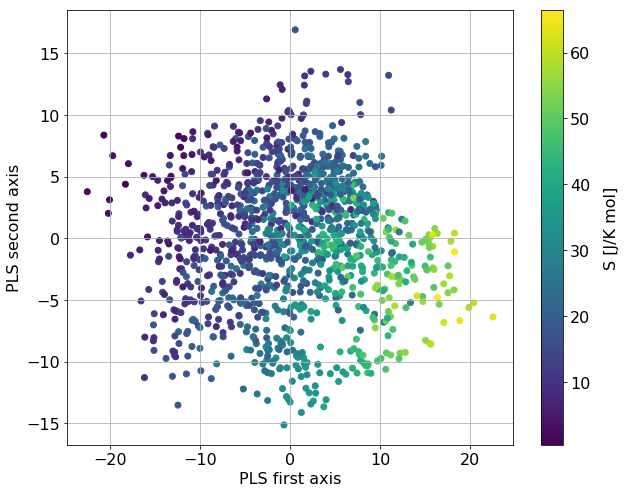

In [19]:
fig,ax = plt.subplots(figsize=(10,8))
ax.grid()
plt.scatter(new_x[:,0],new_x[:,1],c=y.reshape((-1,)).tolist())
cbar = plt.colorbar()
cbar.set_label('S [J/K mol]',  labelpad=14)
#ax.set_xlim([-6,4])
ax.set_xlabel("PLS first axis")
ax.set_ylabel("PLS second axis")
fig.savefig('PLS_2D.pdf')

Text(0, 0.5, 'PLS third axis')

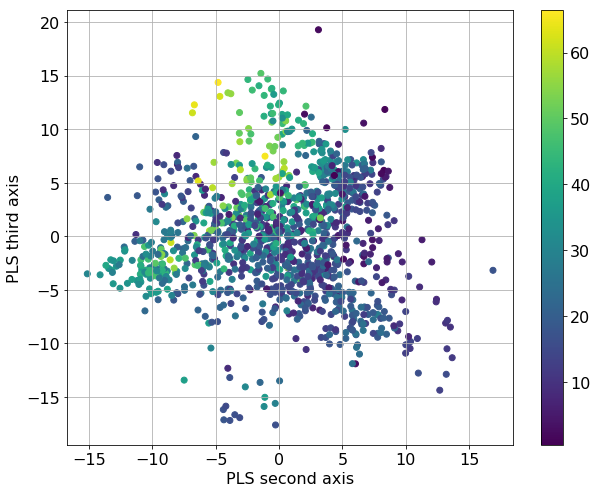

In [12]:
fig,ax = plt.subplots(figsize=(10,8))
ax.grid()
plt.scatter(new_x[:,1],new_x[:,2],c=y.reshape((-1,)).tolist())
plt.colorbar()
#ax.set_xlim([-6,4])
ax.set_xlabel("PLS second axis")
ax.set_ylabel("PLS third axis")

# 3D Visualisation

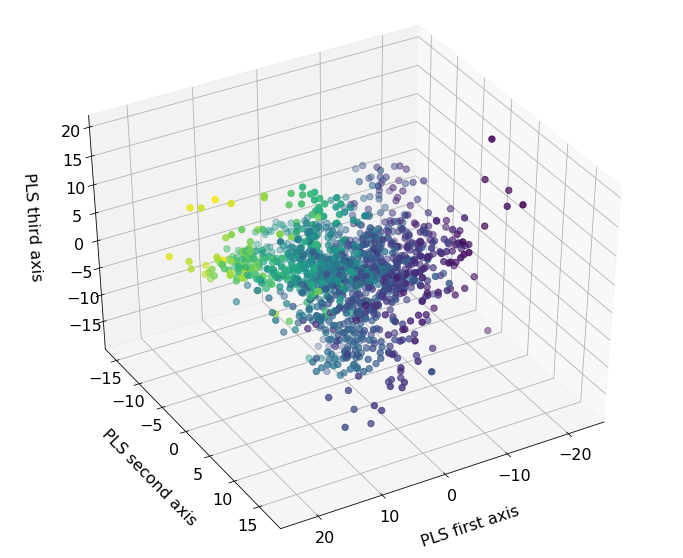

In [20]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new_x[:,0],new_x[:,1],new_x[:,2],c=y.reshape((-1,)).tolist(),s=40)
#lt.colorbar()
#ax.set_xlim([-6,4])
#ax.set_ylim([-6,4])
#x.set_zlim([-10,10])
ax.view_init(elev=40, azim=60)
ax.set_xlabel("PLS first axis")
ax.set_ylabel("PLS second axis")
ax.set_zlabel("PLS third axis")
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20
ax.zaxis.labelpad = 20
fig.savefig('PLS_3D.pdf')

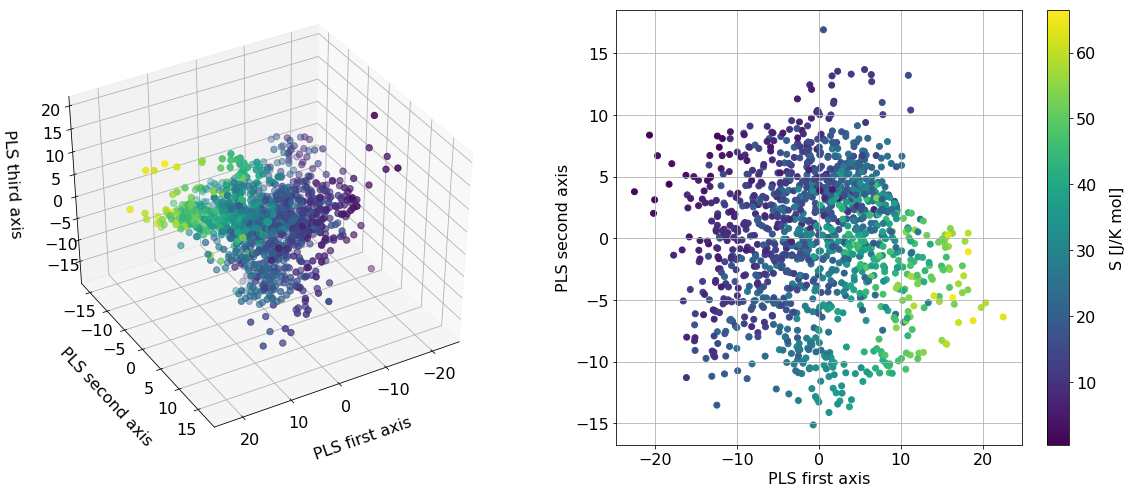

In [28]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(new_x[:,0],new_x[:,1],new_x[:,2],c=y.reshape((-1,)).tolist(),s=40)
#lt.colorbar()
#ax.set_xlim([-6,4])
#ax.set_ylim([-6,4])
#x.set_zlim([-10,10])
ax.view_init(elev=40, azim=60)
ax.set_xlabel("PLS first axis")
ax.set_ylabel("PLS second axis")
ax.set_zlabel("PLS third axis")
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20
ax.zaxis.labelpad = 20

ax = fig.add_subplot(122)
ax.grid()
plt.scatter(new_x[:,0],new_x[:,1],c=y.reshape((-1,)).tolist())
cbar = plt.colorbar()
cbar.set_label('S [J/K mol]',  labelpad=14)
#ax.set_xlim([-6,4])
ax.set_xlabel("PLS first axis")
ax.set_ylabel("PLS second axis")
fig.savefig('PLS.pdf')